In [ ]:
#What should I charge?

In [75]:
import requests
import pandas as pd
import sqlite3 as lite
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [76]:
df = pd.read_csv('dog-vacay.csv')

In [77]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [78]:
df.head()

,city,fee,names,ratings,repeat,response_time,review,services,boarding,sitting,daycare,checkups,walking,bathing,training,grooming,pickup/dropoff
0,"Phoenix, Arizona",35,Big Backyard in Central Phoenix,5,8,1,26,2,1,0,1,0,0,0,0,0,0
1,"Phoenix, Arizona",35,SUZY Q to the Rescue,5,16,2,30,3,1,0,0,1,0,0,0,0,1
2,"Phoenix, Arizona",35,24/7 Dog boarding,0,0,1,0,4,1,0,1,1,1,0,0,0,0
3,"Phoenix, Arizona",38,Messy4dogs@gmail.com,5,2,3,3,4,1,0,1,1,1,0,0,0,0
4,"Phoenix, Arizona",25,Pet Paradise,5,1,1,5,4,1,0,0,1,1,1,0,0,0


In [79]:
#Start by looking at the average
df.describe()

,fee,ratings,repeat,response_time,review,services,boarding,sitting,daycare,checkups,walking,bathing,training,grooming,pickup/dropoff
count,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.00000,4662.000000
mean,38.678464,3.416345,4.817889,1.582154,9.806521,3.162377,0.947662,0.349206,0.637066,0.431145,0.403904,0.154011,0.028529,0.01094,0.199914
std,11.184772,2.308807,9.537766,0.767003,19.448652,1.062929,0.222732,0.476770,0.480898,0.495289,0.490731,0.360998,0.166495,0.10403,0.399979
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,30.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,38.000000,5.000000,1.000000,1.000000,3.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,45.000000,5.000000,5.000000,2.000000,10.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
max,95.000000,5.000000,98.000000,3.000000,370.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


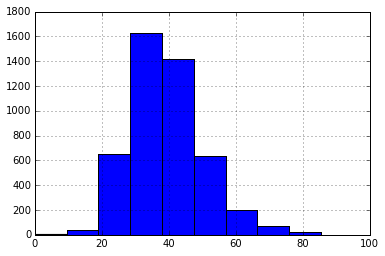

In [80]:
#Histogram of fees
p = df['fee'].hist()
plt.show()

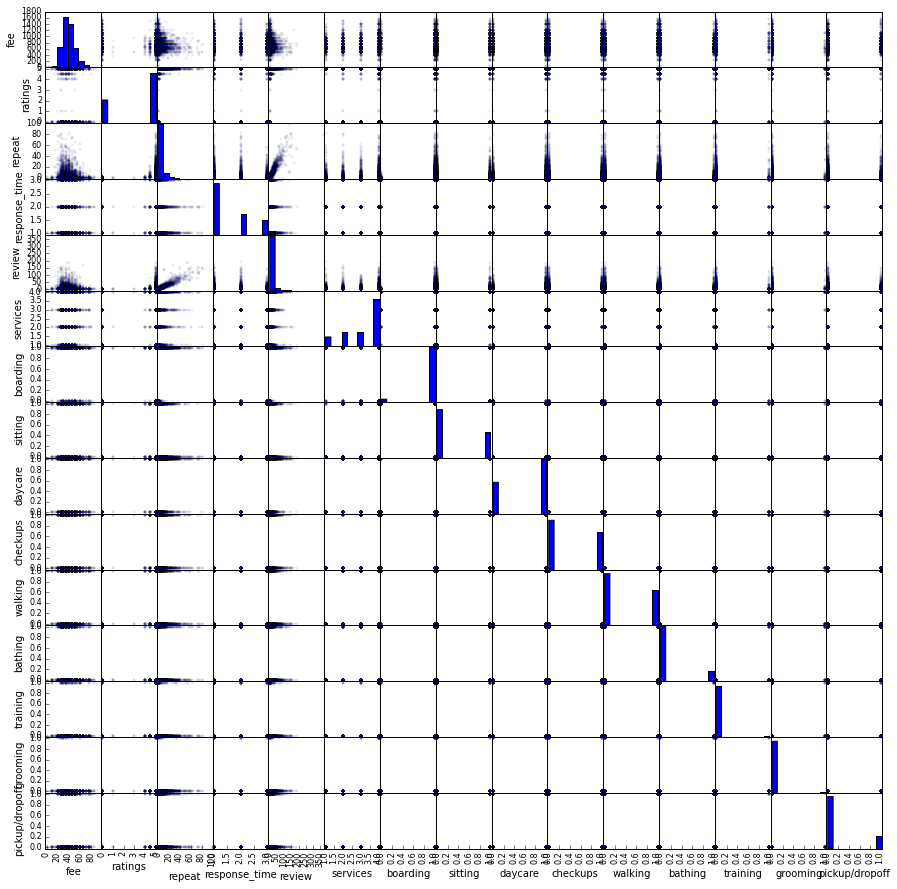

In [81]:
#Create a scatter plot matrix
a = pd.scatter_matrix(df, alpha=.05, figsize=(15,15))
plt.show()

In [82]:
#Extract columns
fee = df['fee']
repeat = df['repeat']
ratings = df['ratings']
response_time = df['response_time']
review = df['review']

In [83]:
#Reshape the series data type
#The dependent variable
y = np.matrix(ratings).transpose()
#The independent variable
x1 = np.matrix(response_time).transpose()
x2 = np.matrix(fee).transpose()

In [84]:
#put the two columns together to create an input matrix (with one column for each independent variable)
x = np.column_stack([x1, x2])

In [85]:
#create linear model
X = sm.add_constant(x)
model = sm.OLS(y,X)
f = model.fit()
f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     48.67
Date:                Tue, 01 Dec 2015   Prob (F-statistic):           1.20e-21
Time:                        20:22:58   Log-Likelihood:                -10467.
No. Observations:                4662   AIC:                         2.094e+04
Df Residuals:                    4659   BIC:                         2.096e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.0493      0.138     29.366      0.000         3.779     4.320
x1             0.2236      0.044      5.123      0.000         0.138     0.309
x2            -0.0255      0.003     -8.522      0.000        -0.031    -0.020
==============================================================================
Omnibus:                    11477.871   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              795.938
Skew:                          -0.782   Prob(JB):                    1.46e-173
Kurtosis:                       1.716   Cond. No.                         168.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
df.groupby('city').mean()

,fee,ratings,repeat,response_time,review,services,boarding,sitting,daycare,checkups,walking,bathing,training,grooming,pickup/dropoff
city,,,,,,,,,,,,,,,
"Atlanta, Georgia",32.216374,4.108187,6.274854,1.625731,13.549708,3.356725,1.000000,0.368421,0.748538,0.491228,0.339181,0.169591,0.035088,0.011696,0.192982
"Austin, Texas",31.566929,3.472441,4.622047,1.488189,9.716535,3.181102,0.874016,0.393701,0.527559,0.472441,0.425197,0.165354,0.031496,0.015748,0.275591
"Boston, Massachusetts",40.935135,4.186486,5.389189,1.621622,10.556757,2.951351,1.000000,0.259459,0.589189,0.378378,0.356757,0.124324,0.010811,0.000000,0.232432
"Charlotte, North Carolina",31.516129,4.123656,6.602151,1.752688,11.709677,3.365591,1.000000,0.408602,0.774194,0.526882,0.376344,0.139785,0.053763,0.010753,0.075269
"Dallas, Texas",31.372093,3.279070,6.284884,1.546512,12.889535,3.250000,0.895349,0.372093,0.651163,0.453488,0.418605,0.186047,0.052326,0.029070,0.191860
"Denver, Colorado",31.228395,3.799383,7.055556,1.629630,12.796296,2.993827,1.000000,0.283951,0.703704,0.351852,0.320988,0.080247,0.000000,0.006173,0.246914
"Houston, Texas",32.235294,3.633987,6.790850,1.411765,14.163399,3.228758,1.000000,0.274510,0.699346,0.535948,0.274510,0.228758,0.032680,0.032680,0.150327
"Los Angeles, California",40.957092,3.023838,4.514899,1.551847,9.828367,3.339690,0.835518,0.506555,0.649583,0.514899,0.450536,0.138260,0.035757,0.013111,0.195471
"Miami, Florida",34.447761,3.264925,3.597015,1.604478,8.447761,3.477612,1.000000,0.320896,0.723881,0.470149,0.485075,0.253731,0.052239,0.000000,0.171642


In [87]:
df.groupby('city').std()

,fee,ratings,repeat,response_time,review,services,boarding,sitting,daycare,checkups,walking,bathing,training,grooming,pickup/dropoff
city,,,,,,,,,,,,,,,
"Atlanta, Georgia",9.337777,1.869647,9.467617,0.789813,21.574812,0.891924,0.000000,0.483793,0.435128,0.501391,0.474822,0.376375,0.184542,0.107829,0.395798
"Austin, Texas",6.306447,2.286353,10.188641,0.743929,20.239400,1.057230,0.333146,0.490505,0.501217,0.501217,0.496331,0.372971,0.175346,0.124992,0.448581
"Boston, Massachusetts",9.193932,1.817512,7.885036,0.750049,14.132843,1.148161,0.000000,0.439528,0.493316,0.486299,0.480342,0.330847,0.103692,0.000000,0.423529
"Charlotte, North Carolina",8.114149,1.891997,11.462737,0.816353,17.718561,0.929995,0.000000,0.494240,0.420379,0.501983,0.487094,0.348643,0.226773,0.103695,0.265255
"Dallas, Texas",7.114842,2.367055,11.909758,0.767116,24.768980,1.003648,0.306997,0.484774,0.477994,0.499285,0.494771,0.390280,0.223333,0.168493,0.394914
"Denver, Colorado",7.245710,2.113591,14.095614,0.779304,25.140880,1.089173,0.000000,0.452311,0.458039,0.479029,0.468304,0.272517,0.000000,0.078567,0.432553
"Houston, Texas",6.503809,2.185483,10.294770,0.712015,23.000989,1.048161,0.000000,0.447733,0.460048,0.500344,0.447733,0.421413,0.178381,0.178381,0.358565
"Los Angeles, California",11.573798,2.430667,10.186657,0.772046,23.696804,0.973508,0.370933,0.500255,0.477385,0.500076,0.497844,0.345378,0.185794,0.113817,0.396799
"Miami, Florida",9.321789,2.371265,6.519052,0.794896,15.071542,0.820017,0.000000,0.468572,0.448754,0.500981,0.501653,0.436778,0.223343,0.000000,0.378484


In [88]:
df.groupby('city').count()

,fee,names,ratings,repeat,response_time,review,services,boarding,sitting,daycare,checkups,walking,bathing,training,grooming,pickup/dropoff
city,,,,,,,,,,,,,,,,
"Atlanta, Georgia",171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171
"Austin, Texas",127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
"Boston, Massachusetts",185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185
"Charlotte, North Carolina",93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93
"Dallas, Texas",172,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172
"Denver, Colorado",162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162
"Houston, Texas",153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153
"Los Angeles, California",839,839,839,839,839,839,839,839,839,839,839,839,839,839,839,839
"Miami, Florida",134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134


In [128]:
#Logistic regression
df['fee30'] = df['fee'].map(lambda x: 1 if x > 25 else 0)

In [131]:
#df.drop(['booked'], axis=1, inplace=True)

In [132]:
intercept = [1] * len(df)
df['intercept'] = intercept

In [133]:
ind_vars = ['intercept','review', 'repeat']

In [134]:
df.head()

,city,fee,names,ratings,repeat,response_time,review,services,boarding,sitting,daycare,checkups,walking,bathing,training,grooming,pickup/dropoff,intercept,fee30
0,"Phoenix, Arizona",35,Big Backyard in Central Phoenix,5,8,1,26,2,1,0,1,0,0,0,0,0,0,1,1
1,"Phoenix, Arizona",35,SUZY Q to the Rescue,5,16,2,30,3,1,0,0,1,0,0,0,0,1,1,1
2,"Phoenix, Arizona",35,24/7 Dog boarding,0,0,1,0,4,1,0,1,1,1,0,0,0,0,1,1
3,"Phoenix, Arizona",38,Messy4dogs@gmail.com,5,2,3,3,4,1,0,1,1,1,0,0,0,0,1,1
4,"Phoenix, Arizona",25,Pet Paradise,5,1,1,5,4,1,0,0,1,1,1,0,0,0,1,0


In [135]:
logit = sm.Logit(df['fee30'], df[ind_vars])

In [136]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.372082
         Iterations 6


In [137]:
coeff = result.params
print coeff

intercept    2.040146
review       0.001936
repeat      -0.018604
dtype: float64


In [138]:
def logistic_function(review, repeat):
    # p(x) = 1/(1 + e^(intercept + 0.087423(FicoScore) − 0.000174(LoanAmount))
    prob = 1/(1 + math.exp(coeff[0] + coeff[1]*review +coeff[2]*repeat))
    return prob

In [149]:
logistic_function(12, 6)

0.12436196321710824

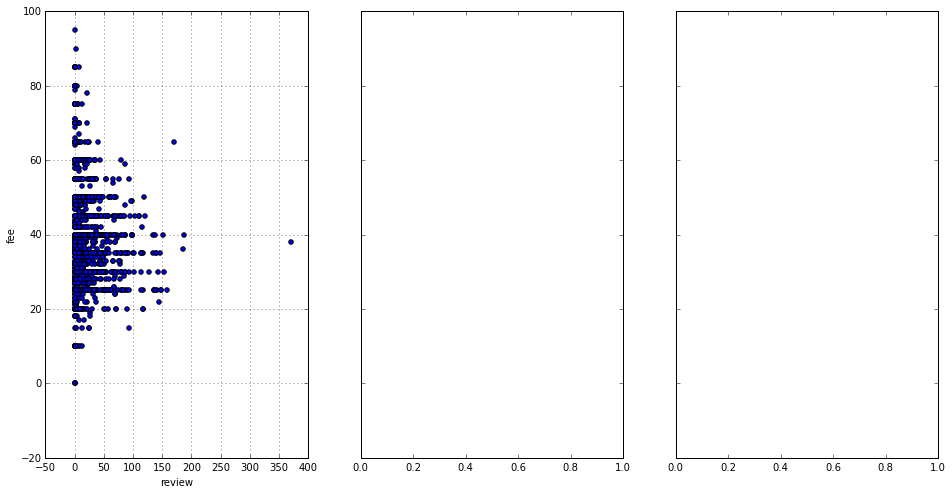

In [158]:
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='review', y='fee', ax=axs[0], figsize=(16, 8))